In [1]:
import pandas as pd

data = pd.read_csv("data-final.csv",delimiter='\t')


In [4]:

data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


(4659, 110)
(1933, 110)
223


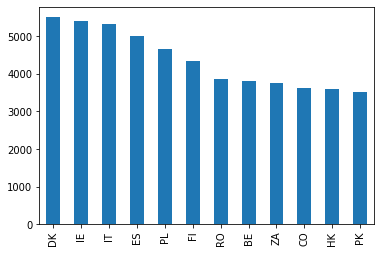

In [11]:
print(data[data["country"] == "PL"].shape)
print(data[data["country"] == "JP"].shape)
series = data["country"].value_counts()
print(len(series))
lol = data["country"].value_counts().between(3500,6000)
plt = series[lol].plot.bar()


In [24]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [105]:

data2 =  data.loc[:,'EXT1':'EXT10'].join(data[['country']])
data2.head()


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,KE


In [106]:
data3 = data2.loc[data2['country'].isin(['PL','IE'])] #'DK','IT'
data3.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,country
53,1.0,4.0,5.0,4.0,4.0,1.0,2.0,1.0,1.0,2.0,IE
222,1.0,5.0,2.0,5.0,1.0,5.0,1.0,4.0,1.0,5.0,PL
238,3.0,1.0,4.0,2.0,4.0,2.0,2.0,5.0,1.0,2.0,IE
247,4.0,1.0,4.0,3.0,1.0,4.0,1.0,3.0,3.0,5.0,IE
295,4.0,1.0,4.0,2.0,4.0,1.0,4.0,2.0,4.0,2.0,IE


In [115]:
print(data3.shape)
X = data3.drop('country',axis=1).values
y = data3['country'].values
print(X)
print('przerwa')
print(y)

print(data3.isnull().values.sum())
print(data3[data3.isnull().any(axis=1)])
data4 = data3.dropna()
print(data4.isnull().values.sum())
print(data4[data4.isnull().any(axis=1)])
print('witam')
print(data4.shape)
X = data4.drop('country',axis=1).values
y = data4['country'].values
from sklearn import preprocessing
import numpy as np
import tensorflow as tf
# encoder = preprocessing.LabelEncoder()
# encoder.fit(y)
# y = encoder.transform(y)
# y = tf.keras.utils.to_categorical(y)
lb = preprocessing.LabelBinarizer()
y = lb.fit_transform(y)
print(y)

(10068, 11)
[[1. 4. 5. ... 1. 1. 2.]
 [1. 5. 2. ... 4. 1. 5.]
 [3. 1. 4. ... 5. 1. 2.]
 ...
 [1. 2. 4. ... 5. 4. 2.]
 [1. 5. 1. ... 5. 1. 5.]
 [3. 1. 5. ... 1. 5. 4.]]
przerwa
['IE' 'PL' 'IE' ... 'IE' 'IE' 'PL']
20
        EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10 country
223328   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN      IE
263201   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN      PL
0
Empty DataFrame
Columns: [EXT1, EXT2, EXT3, EXT4, EXT5, EXT6, EXT7, EXT8, EXT9, EXT10, country]
Index: []
witam
(10066, 11)
[[0]
 [1]
 [0]
 ...
 [0]
 [0]
 [1]]


In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [117]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(y_train)

[[0.6 0.8 0.4 ... 0.4 1.  0.8]
 [0.6 0.6 0.6 ... 0.8 1.  1. ]
 [0.6 0.4 0.6 ... 0.8 0.8 0.4]
 ...
 [0.2 1.  0.2 ... 1.  1.  0.8]
 [0.8 0.4 0.8 ... 0.4 1.  0.6]
 [0.6 0.8 0.4 ... 0.4 0.8 0.4]]
[[0]
 [0]
 [0]
 ...
 [1]
 [0]
 [0]]


In [124]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout,Flatten
from tensorflow.keras.constraints import max_norm
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

model = Sequential()





model.add(Dense(10,  activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(6, activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(3, activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(units=1,activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

model.fit(x=X_train, 
          y=y_train, 
          epochs=30,
          validation_data=(X_test, y_test)
          )

Epoch 1/30
252/252 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.5476 - val_loss: 0.6802 - val_accuracy: 0.6053
Epoch 2/30
252/252 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.5577 - val_loss: 0.6800 - val_accuracy: 0.5978
Epoch 3/30
252/252 [==============================] - 0s 2ms/step - loss: 0.6805 - accuracy: 0.5635 - val_loss: 0.6718 - val_accuracy: 0.6058
Epoch 4/30
252/252 [==============================] - 0s 2ms/step - loss: 0.6788 - accuracy: 0.5817 - val_loss: 0.6699 - val_accuracy: 0.6162
Epoch 5/30
252/252 [==============================] - 0s 2ms/step - loss: 0.6771 - accuracy: 0.5811 - val_loss: 0.6679 - val_accuracy: 0.6157
Epoch 6/30
252/252 [==============================] - 0s 2ms/step - loss: 0.6718 - accuracy: 0.5961 - val_loss: 0.6649 - val_accuracy: 0.6112
Epoch 7/30
252/252 [==============================] - 0s 1ms/step - loss: 0.6735 - accuracy: 0.5862 - val_loss: 0.6691 - val_accuracy: 0.6147
Epoch 

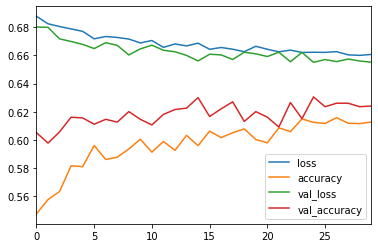

In [125]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()